In [1]:
from IPython.display import HTML
HTML("""
Tasks:

1. Sample estimation of PDF (histogram, kernel density estimation)

2. Theoretical distributions PDFs

3. Distribution parameters estimation (graphical method)

4. Biplots (QQ and PP)

5. Statistical hypothesis checking (Kolmogorov Smirnov test, Pearsons chi-squared test, omega-squared test)


Potential distributions:
Weibull distribution (2 parameters) x
Rician distribution (2 parameters) x
Students distribution (1 parameter) x
Rayleigh distribution (1 parameter) x
T location-scale distribution (3 parameters) ?
Noncentral chi-square distribution (2 parameters) ?
Noncentral F distribution (3 parameters) x
Nakagami distribution (2 parameters) x
Loglogistic distribution (2 parameters) ?
Logistic distribution (2 parameters) x
Beta distribution (2 parameters) x
Generalized extreme values distribution (2 parameters) ?
Gamma distribution (2 parameters) x
Lognormal distribution (2 parameters) x
Normal distribution (2 parameters) x
""")

Tasks:

1. Sample estimation of PDF (histogram, kernel density estimation)

2. Theoretical distributions PDFs

3. Distribution parameters estimation (graphical method)

4. Biplots (QQ and PP)

5. Statistical hypothesis checking (Kolmogorov Smirnov test, Pearsons chi-squared test, omega-squared test)


Potential distributions:
Weibull distribution (2 parameters) x
Rician distribution (2 parameters) x
Students distribution (1 parameter) x
Rayleigh distribution (1 parameter) x
T location-scale distribution (3 parameters) ?
Noncentral chi-square distribution (2 parameters) ?
Noncentral F distribution (3 parameters) x
Nakagami distribution (2 parameters) x
Loglogistic distribution (2 parameters) ?
Logistic distribution (2 parameters) x
Beta distribution (2 parameters) x
Generalized extreme values distribution (2 parameters) ?
Gamma distribution (2 parameters) x
Lognormal distribution (2 parameters) x
Normal distribution (2 parameters) x

In [2]:
import numpy as np

sample = np.loadtxt('sample_14.txt')
sample.__sizeof__()

8096

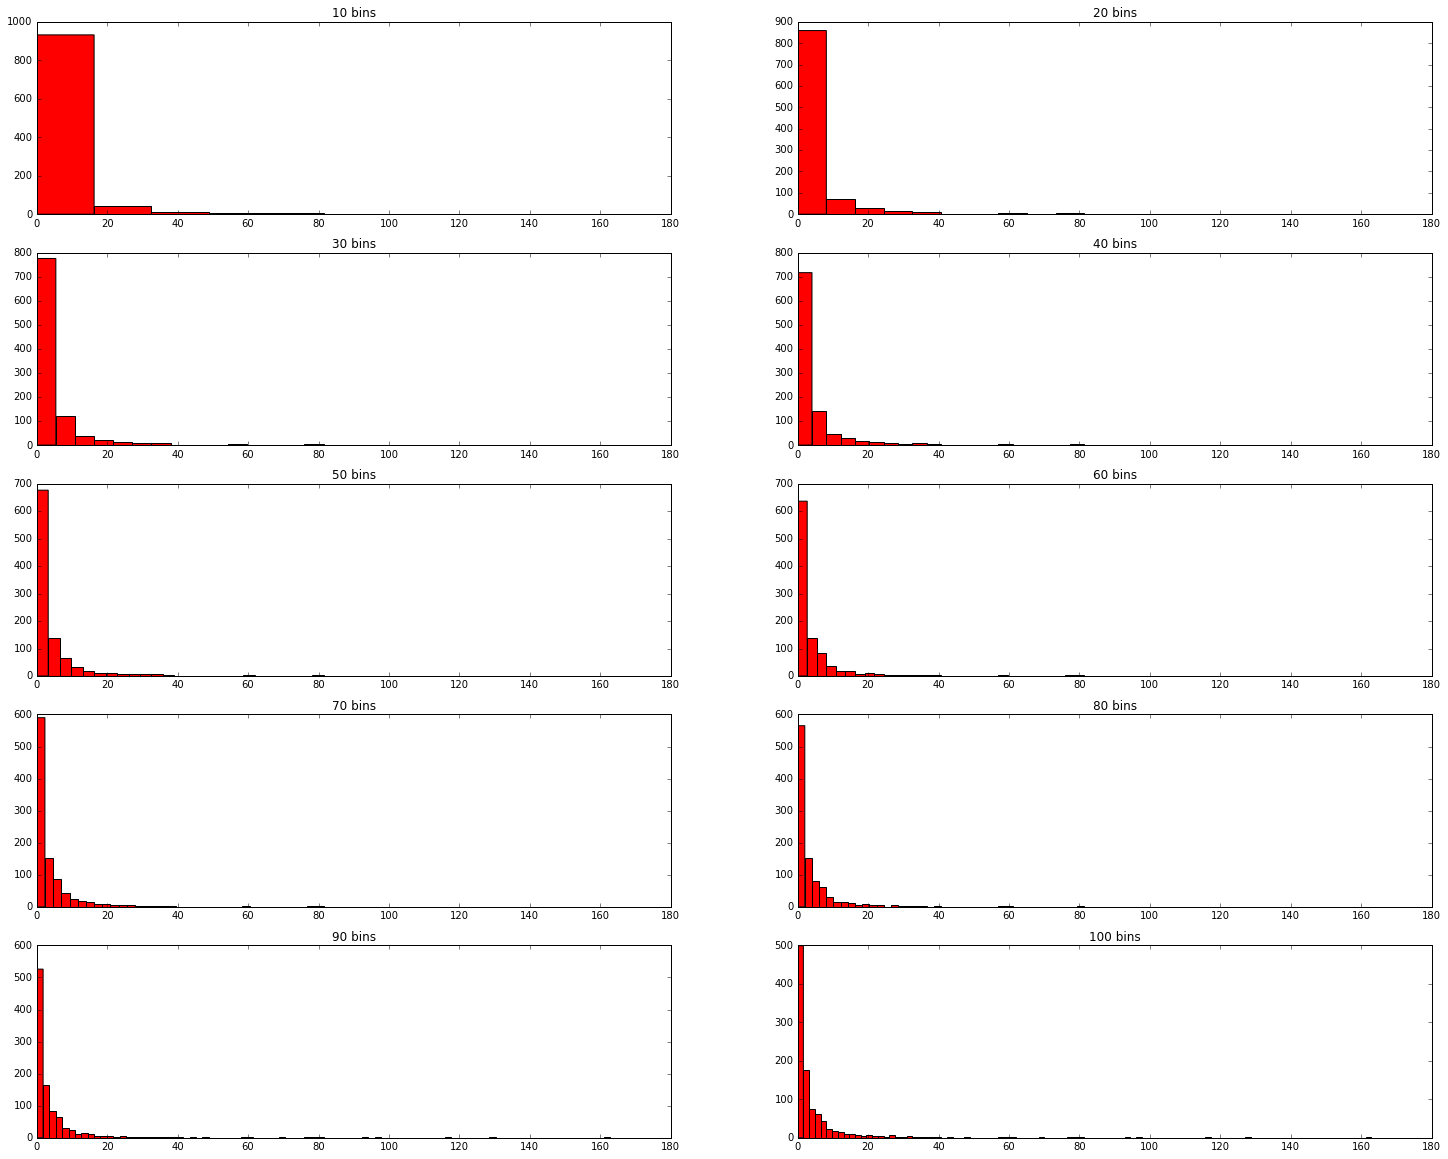

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(1,figsize=(25,20))
for i in range(1, 11):
    bins = i * 10
    plt.subplot(5,2, i)
    plt.hist(sample, fc='red',bins=bins)
    plt.title(str(bins) + ' bins')
plt.show()

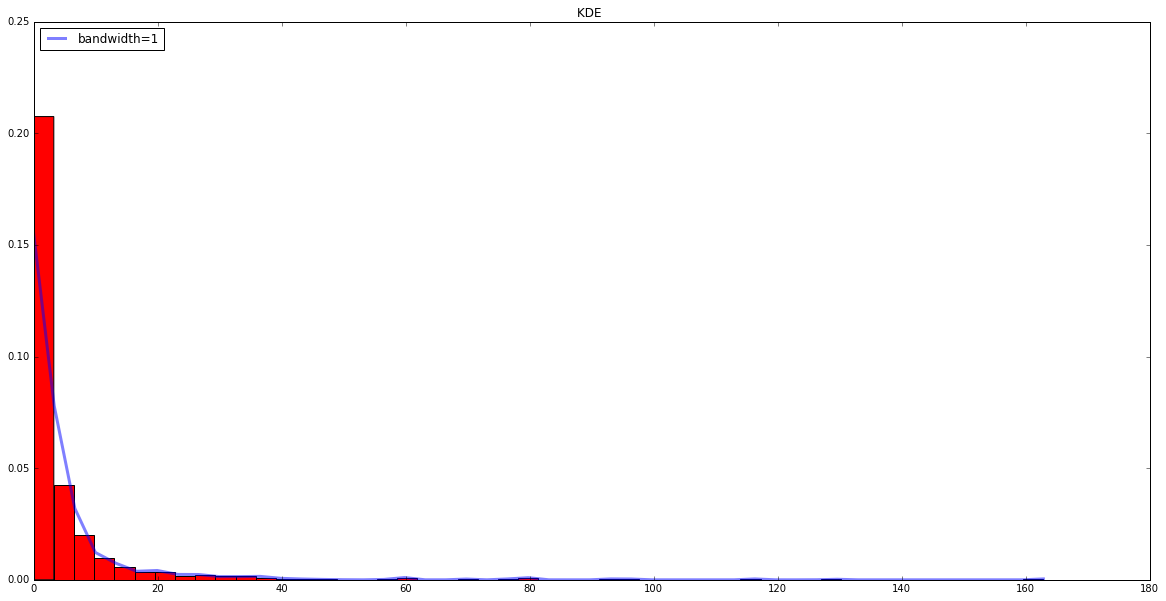

In [4]:
import scipy.stats as stats

x_grid = np.linspace(sample.min(), sample.max())

plt.figure(2,figsize=(20,10))
bandwidth = 1
kde = stats.gaussian_kde(sample, bw_method=bandwidth / sample.std(ddof=1))
pdf = kde.evaluate(x_grid)
plt.plot(x_grid, pdf, label='bandwidth={0}'.format(bandwidth), linewidth=3, alpha=0.5)
plt.hist(sample, bins=50, fc='red',  normed=True)
plt.legend(loc='upper left')
plt.title('KDE ')
plt.show()

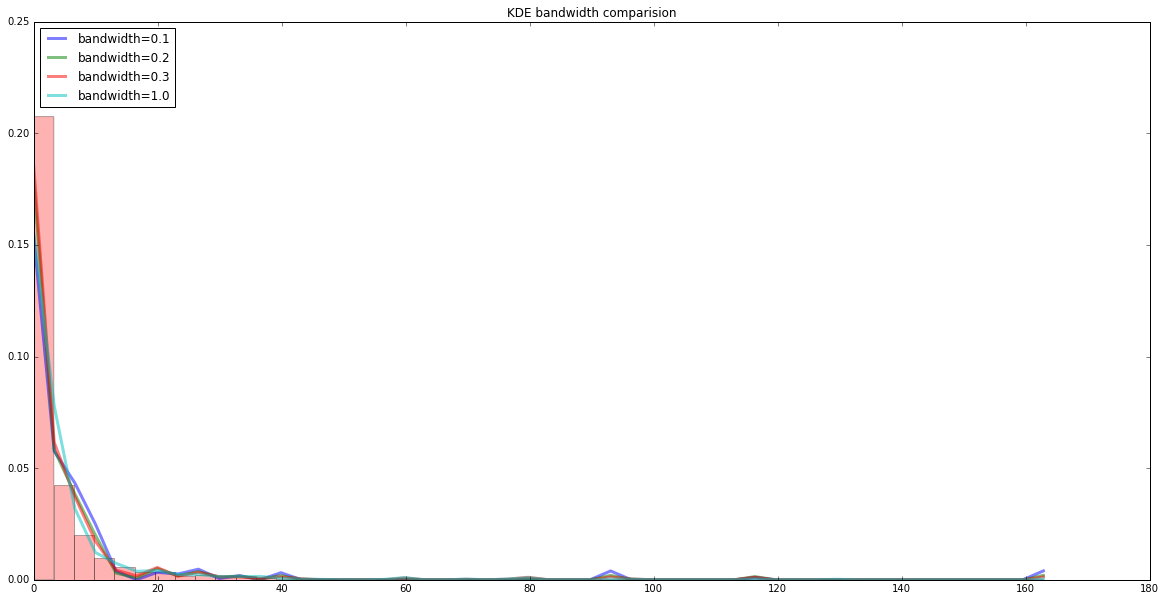

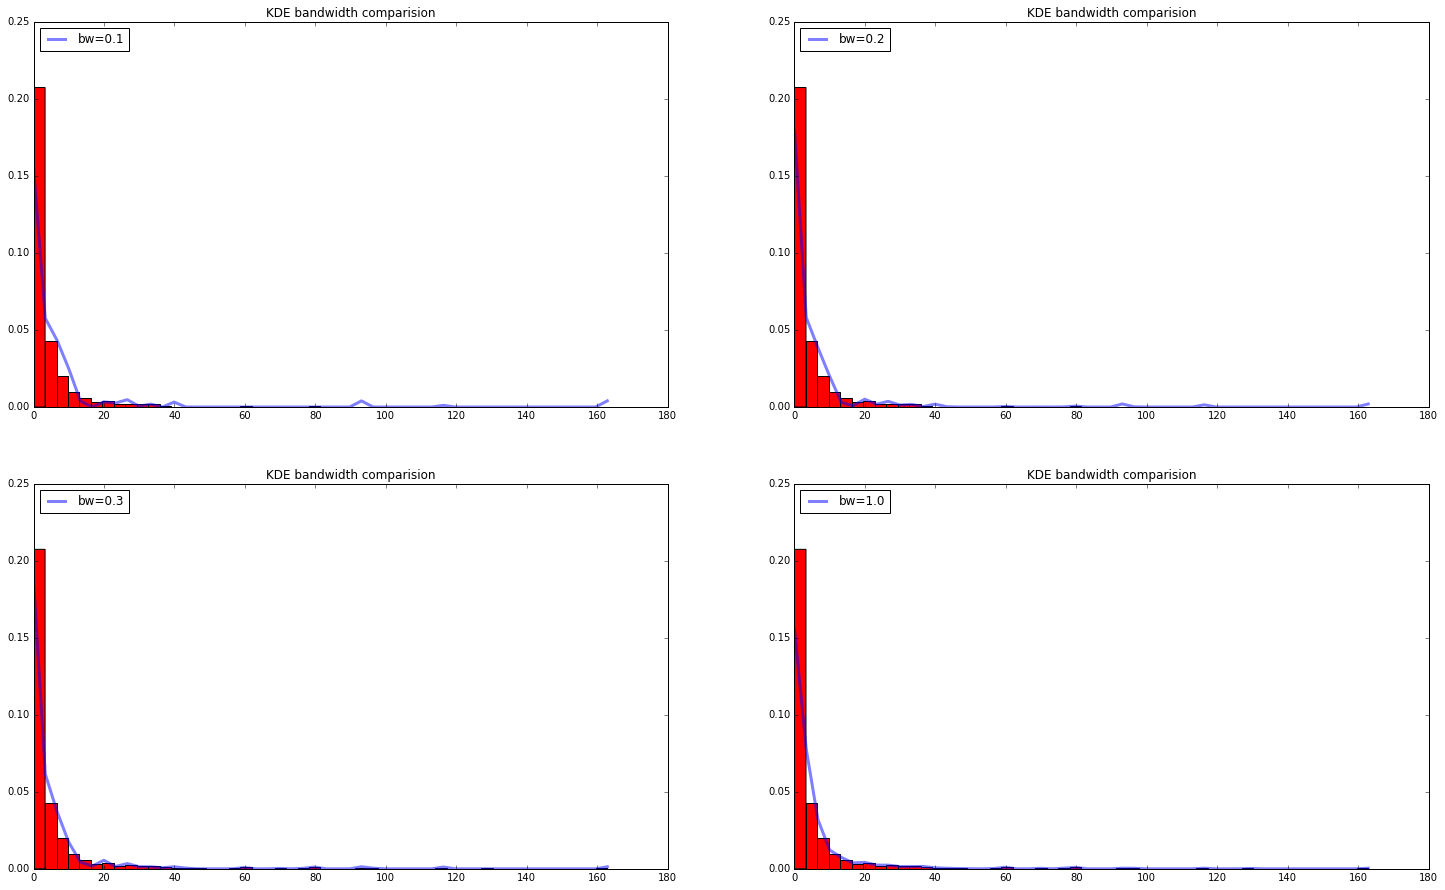

In [5]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    from sklearn.neighbors import KernelDensity
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)


x_grid = np.linspace(sample.min(), sample.max())

fig = plt.figure(3, figsize=(20, 10))
ax = fig.add_subplot(111)
bandwidths = [0.1, 0.2, 0.3, 1.0]
for bandwidth in bandwidths:
    ax.plot(x_grid, kde_sklearn(sample, x_grid, bandwidth=bandwidth), label='bandwidth={0}'.format(bandwidth),
            linewidth=3, alpha=0.5)
ax.hist(sample, 50, fc='red', alpha=0.3, normed=True)
ax.legend(loc='upper left')
plt.title('KDE bandwidth comparision')
plt.show()

fig = plt.figure(4, figsize=(25, 40))
i = 1
for bandwidth in bandwidths:
    plt.subplot(5, 2, i)
    plt.plot(x_grid, kde_sklearn(sample, x_grid, bandwidth=bandwidth), label='bw={0}'.format(bandwidth), linewidth=3,
             alpha=0.5)
    plt.hist(sample, 50, fc='red', normed=True)
    plt.legend(loc='upper left')
    plt.title('KDE bandwidth comparision')
    i += 1

plt.show()

NameError: name 'size' is not defined

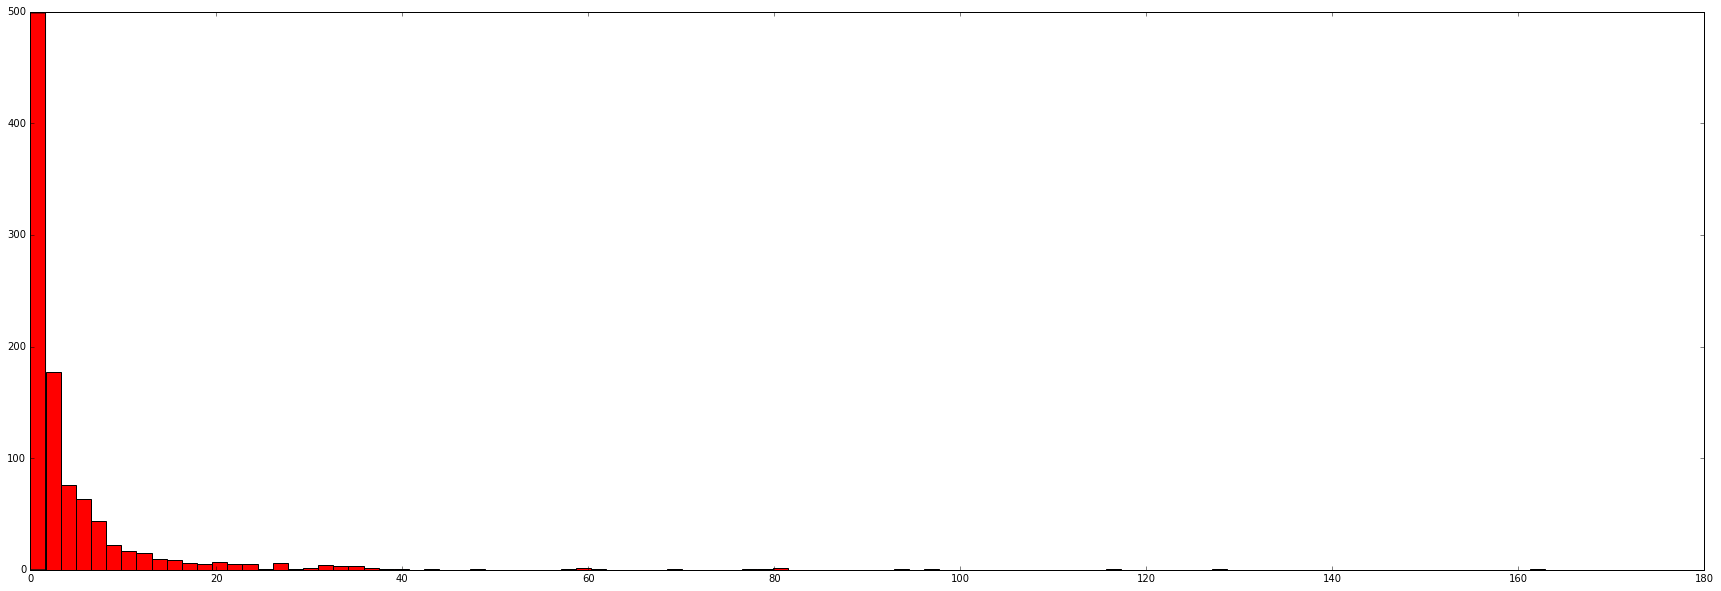

In [6]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats

plt.figure(5, figsize=(30, 10))
h = plt.hist(sample, bins=100, color='w', fc='red')

dist_names = ['gamma']


for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(sample)
    pdf_fitted = dist.pdf(scipy.arange(8096), *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,47)
plt.legend(loc='upper right')
plt.show()

C:\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:404: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*sqrt(a + b + 1) / (a + b + 2) / sqrt(a*b)
C:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


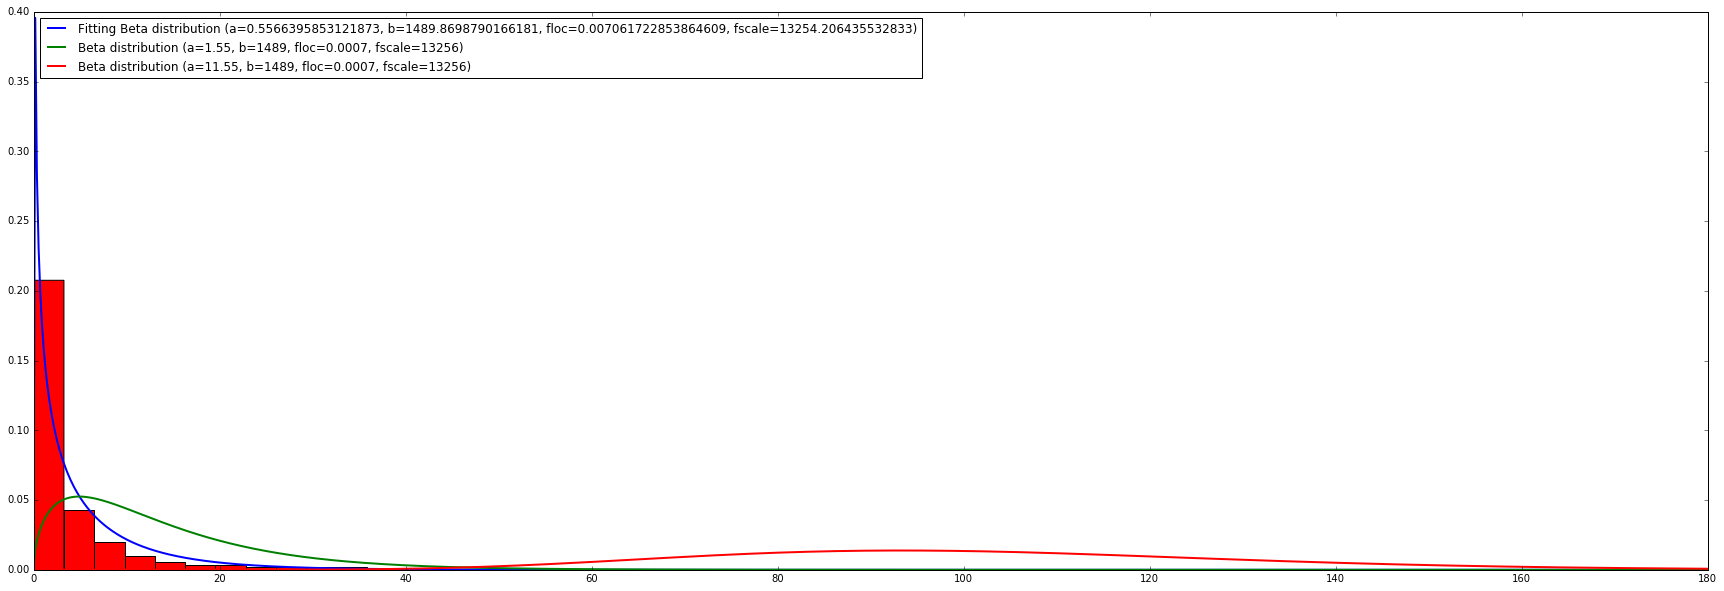

In [10]:
from scipy import stats  
import numpy as np  
import matplotlib.pylab as plt


plt.figure(6, figsize=(30, 10))
plt.hist(sample,bins=50, normed=True,color="red")

xt = plt.xticks()[0]  
lnspc = np.linspace(min(xt), max(xt), len(sample))


distribution = "Beta distribution"
all_parameters = [
    [1.55, 1489, 0.0007, 13256],
    [11.55, 1489, 0.0007, 13256]
]
# Fitting by scipy
a, b, floc, fscale = stats.beta.fit(sample)
pdf_beta = stats.beta.pdf(lnspc, a, b, floc, fscale)
plt.plot(lnspc, pdf_beta, label="Fitting {} (a={}, b={}, floc={}, fscale={})".format(distribution, a, b, floc, fscale),linewidth=2.0)

# Fitting by hand
for parameters in all_parameters:
    plt.plot(lnspc, stats.beta.pdf(lnspc, *parameters), label="{} (a={}, b={}, floc={}, fscale={})".format(distribution, *parameters),linewidth=2.0)
    plt.legend(loc='upper left')
plt.show()